In [43]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X, y = load_wine(return_X_y=True)

X


array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [44]:
clf = KMeans(n_clusters=4, random_state=10)

clf.fit(X)

adj_rand_score = metrics.adjusted_rand_score(y, clf.predict(X))

adj_rand_score

0.30289726650864374

In [45]:
scaler = StandardScaler()

scaler.fit(X)

X_t = scaler.transform(X)

X_t[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

In [46]:
X[0]

array([  1.42300000e+01,   1.71000000e+00,   2.43000000e+00,
         1.56000000e+01,   1.27000000e+02,   2.80000000e+00,
         3.06000000e+00,   2.80000000e-01,   2.29000000e+00,
         5.64000000e+00,   1.04000000e+00,   3.92000000e+00,
         1.06500000e+03])

In [47]:
clf_t = KMeans(n_clusters=4, random_state=10)

clf_t.fit(X_t)

adj_rand_score = metrics.adjusted_rand_score(y, clf_t.predict(X_t))

adj_rand_score

0.69358525341763555

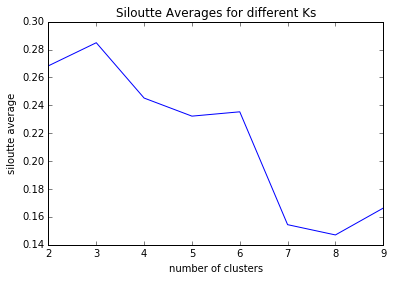

In [48]:
sil_avg = []

range_n_clusters = range(2, 10)

for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(X_t)
    silouette_avg = silhouette_score(X_t, cluster_labels)
    sil_avg.append(silouette_avg)
    

plt.plot(range_n_clusters, sil_avg)
plt.title("Siloutte Averages for different Ks")
plt.xlabel("number of clusters")
plt.ylabel("siloutte average")
plt.show()
    

In [49]:
k_optimal = range_n_clusters[sil_avg.index(max(sil_avg))]
k_optimal

3

In [50]:
clf = KMeans(n_clusters=k_optimal, random_state=10)

clf.fit(X_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [52]:
adj_rand_score = metrics.adjusted_rand_score(y, clf.predict(X_t))

adj_rand_score

0.89749498150932072

In [55]:
print(metrics.homogeneity_score(y, clf.predict(X_t)))
print(metrics.completeness_score(y, clf.predict(X_t)))
print(metrics.v_measure_score(y, clf.predict(X_t)))
print(metrics.adjusted_rand_score(y, clf.predict(X_t)))
print(metrics.adjusted_mutual_info_score(y, clf.predict(X_t)))
print(metrics.silhouette_score(X, clf.predict(X_t)))

0.878843200366
0.872963601608
0.875893534122
0.897494981509
0.871623031517
0.194281840941
